In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train = pd.read_csv('SalaryData_Train.csv')
data_test = pd.read_csv('SalaryData_Test.csv')

In [4]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
data_train = data_train.apply(LabelEncoder().fit_transform)

In [11]:
data_test = data_test.apply(LabelEncoder().fit_transform)

In [12]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [13]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [14]:
data_train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,21.435695,2.19933,10.33361,9.121316,2.580087,5.959849,1.418322,3.678592,0.675707,6.552667,2.070621,39.871556,35.413481,0.248931
std,13.125521,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,23.285175,10.022497,11.772020,5.956430,0.432401
min,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.00000,9.00000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,37.000000,0.000000
50%,20.000000,2.00000,11.00000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,37.000000,0.000000
75%,30.000000,2.00000,12.00000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,37.000000,0.000000
max,71.000000,6.00000,15.00000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,117.000000,89.000000,93.000000,39.000000,1.000000


In [15]:
data_test.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,21.767331,2.214874,10.272377,9.112749,2.595286,5.989044,1.401394,3.683665,0.673772,6.003453,1.873639,39.892762,35.467596,0.245684
std,13.376938,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,21.537847,9.109995,11.828774,5.880922,0.430506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,9.000000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,37.000000,0.000000
50%,20.000000,2.000000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,37.000000,0.000000
75%,31.000000,2.000000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,37.000000,0.000000
max,72.000000,6.000000,15.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,109.000000,78.000000,88.000000,39.000000,1.000000


In [16]:
corr = data_train.corr()

<AxesSubplot:>

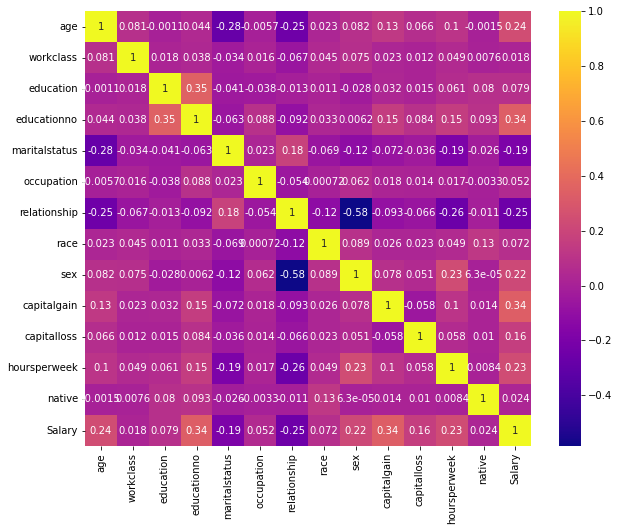

In [17]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap='plasma')

In [18]:
X_train= data_train.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_train= data_train['Salary'].values
print(np.unique(Y_train))
X_train

[0 1]


array([[22,  5, 12, ...,  0, 39,  0],
       [33,  4, 12, ...,  0, 12,  0],
       [21,  2,  8, ...,  0, 39,  0],
       ...,
       [41,  2,  8, ...,  0, 39,  0],
       [ 5,  2,  8, ...,  0, 19,  0],
       [35,  3,  8, ...,  0, 39,  1]], dtype=int64)

In [19]:
X_test= data_test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test= data_test['Salary'].values
print(np.unique(Y_test))
X_test

[0 1]


array([[ 8,  2,  6, ...,  0, 39,  0],
       [21,  2,  8, ...,  0, 49,  0],
       [11,  1, 11, ...,  0, 39,  1],
       ...,
       [21,  2, 12, ...,  0, 49,  0],
       [27,  2, 12, ...,  0, 39,  0],
       [18,  3, 12, ...,  0, 59,  1]], dtype=int64)

In [20]:
#Gaussian Naive Bayes model
Gnb = GaussianNB()
Gnb.fit(X_train, Y_train)

GaussianNB()

In [21]:
Gnb.score(X_train, Y_train)

1.0

In [22]:
#predictions on testing data
y_pred = Gnb.predict(X_test)

In [23]:
acc_test = np.mean(y_pred == Y_test)
acc_test

1.0

In [24]:
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy: 100.0


In [25]:
#Multinomial Naive Bayes model
Mnb = MultinomialNB()
Mnb.fit(X_train, Y_train)

MultinomialNB()

In [26]:
Mnb.score(X_test, Y_test)

0.7820053120849934

In [27]:
y_pred1 = Mnb.predict(X_train)

In [28]:
acc_train = np.mean(y_pred1 == Y_train)
acc_train

0.7800802360664434

In [29]:
predict_test = Mnb.predict(X_test)
acc_test1 = np.mean(predict_test == Y_test)
acc_test1

0.7820053120849934

In [30]:
m={'model': ['GaussianNB', 'MultinomialNB'],
  'accuracy': [acc_test, acc_test1]}
m = pd.DataFrame(m)
m

,model,accuracy
0,GaussianNB,1.000000
1,MultinomialNB,0.782005
